In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import HTML,Latex

## Info

In [2]:
'''
INFO

1. NN archi 
    n-input neurons
    h-hidden layer neuurons
    1-output neuron
2. cost function : sum of error squared
3. activation functions : sigmoid|ReLu then linear

''';

## The NN model as a Class

In [3]:
'''
Function approximator class
'''
class FA:
    def __init__(self,
                 n_input_neurons=1,
                 n_hidden_neurons=12,
                 intermidiate_activation_function='sigmoid',
                 learning_rate=1e-2,
                 n_iters=1_000):
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        
        assert intermidiate_activation_function in  ['sigmoid','relu']
        self.activation_function = {'sigmoid':sigmoid,'relu':relu}[intermidiate_activation_function]
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        
    def fit(self,X,y):
        assert X.shape[0] == self.n_input_neurons
        assert y.shape[0] == 1
        assert y.shape[1] == X.shape[1], "Number of examples : should match in inputs and targets"

        self.cost_history = []

        # define hyper parameters.
        m = y.shape[1] # number of examples given
        n = self.n_input_neurons # input feature count
        h = self.n_hidden_neurons # hidden neuron count

        #initialize weights and biases.
        w = np.random.randn(h,1)
        b = np.random.randn(1,1)
        V = np.random.randn(h,n)
        c = np.random.randn(h,1)

        #fine tune parameters.
        start_time = time.time()
        for i in range(self.n_iters):
                
                # progress message : every 100 iteration except for the first one
                if i and not i%100:
                    time_now = time.time()
                    time_remaining = get_nice_time_dura_str ((self.n_iters - i) * (time_now - start_time) / i)
                    print(f"iteration : {i} ---> ETA : {time_remaining} ",end="\r")
                    

                #forward pass
                H = self.activation_function(V@X + c)
                y_pred = w.T@H + b

                #calculate the cost for the current parameters.
                cost = 1/(2*m) * np.sum((y_pred - y)**2)
                self.cost_history.append(cost)

                #backpropagation
                diff = (y_pred - y)
                
                if self.activation_function == sigmoid:
                    high_level_derivative = H * (1 - H)
                elif self.activation_function == relu:
                    high_level_derivative = np.where(H>=0,1.,0.)
 


                dEdb  = diff.sum() / m
                dEdw = H@diff.T / m
                dEdc = w * (high_level_derivative@diff.T) / m
                dEdV = w *  ( (diff * high_level_derivative)@X.T ) / m

                # update rule : gradient decent.
                b -= self.learning_rate * dEdb
                w -= self.learning_rate * dEdw
                V -= self.learning_rate * dEdV
                c -= self.learning_rate * dEdc


        #save tuned parameters
        self.b = b
        self.w = w
        self.V = V
        self.c = c
        
        time_now = time.time()
        total_time = get_nice_time_dura_str(time_now - start_time)
        print(f"Training ended : n_iters: {self.n_iters} with learning_rate : {self.learning_rate}. Time taken : {total_time}")
        
    def show_cost_history(self,log=False):
        #plot the cost history
        
        history_vals = self.cost_history
        title = "Cost vs. iteration"
        if log:
            history_vals = np.log(self.cost_history)
            title = "LOG(Cost) vs. iteration"
            
        
        fig,ax = plt.subplots(1)
        ax.plot(history_vals)
        ax.set_title(title)
        ax.grid()
        plt.show()
        
    def predict(self,X):
        
        H = self.activation_function(self.V@X + self.c)
        y_pred = (self.w).T@H + self.b
        
        return y_pred
    
    

    
    
# define activation functions globally
def sigmoid(t):
        return 1/ ( 1 + np.exp(-t) )
      
def relu(t): # from chat gpt : this is safe for any dimension array t
    return np.maximum(0,t)
    
    
    
    
# helper functions
def get_nice_time_dura_str(time_in_secs):
    time_in_secs = round(time_in_secs,2)
    if time_in_secs >= 60:
        n_mins = int(time_in_secs//60)
        n_secs = round(time_in_secs%60,2)
        return f"{n_mins} min {n_secs} secs"
    return f"{time_in_secs} secs"
    

### Approximating a univariate function

Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 10.69 secs


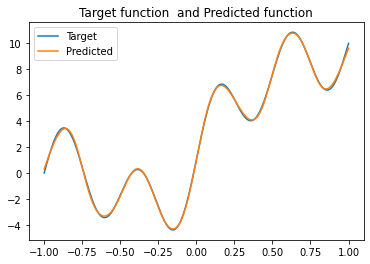

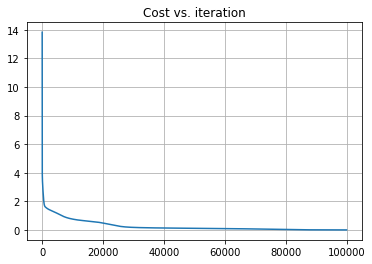

In [10]:
%matplotlib inline
# define a polynomial
def my_func(x):
    
    return 1*x**5 -5*x**4 -7*x**3 + 9*x**2 + 11*x + 1 + 1.5 * np.sin(2 * np.pi * x) + 2.9 * np.sin(2 * 2 * np.pi * x)
    


# make a data set
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_func(x_train)



my_fa = FA(n_input_neurons=1,n_hidden_neurons=16,learning_rate=1e-1,n_iters=1_00_000,intermidiate_activation_function='sigmoid') 
my_fa.fit(x_train,y_train)


predictions = my_fa.predict(x_train)

fig,ax = plt.subplots(1)
ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
ax.legend()
ax.set_title("Target function  and Predicted function")
plt.show()

my_fa.show_cost_history()


<font color="red">
    The NN can approximate exactly the target function with higher values of n_hidden_neurons and n_iterns.  
    <br/>Here Shown for a not-enough-high those params so can see that NN is trying it's best to approximate.
</font>

## Approximating a bi-variate function

Training ended : n_iters: 10000 with learning_rate : 1.0. Time taken : 28.61 secs


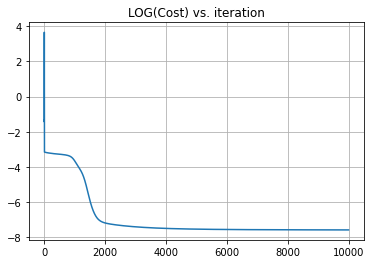

In [11]:
# define a polynomial
def my_func_bi(xx1, xx2):
    return np.sqrt(xx1**2 +  xx2**2)
    return np.sin(2 * np.pi * np.sqrt(xx1**2 + xx2**2))
    


# make a data set
x1 = np.linspace(-1,1,100+1)
x2 = np.linspace(-1,1,100+1)
xx1, xx2 = np.meshgrid(x1, x2)  
yy = my_func_bi(xx1, xx2)

#reshaping arrays (flatterning)
xx1_xx2 = np.dstack((xx1,xx2))
x_train = np.ravel(xx1_xx2).reshape(-1,2).T
y_train = yy.reshape(1,-1)



my_fa = FA(n_input_neurons=2,n_hidden_neurons=12,learning_rate=1e0,n_iters=1_0_000,intermidiate_activation_function='sigmoid') 
my_fa.fit(x_train,y_train)


predictions = my_fa.predict(x_train)


%matplotlib inline
my_fa.show_cost_history(log=True)



<IPython.core.display.Javascript object>


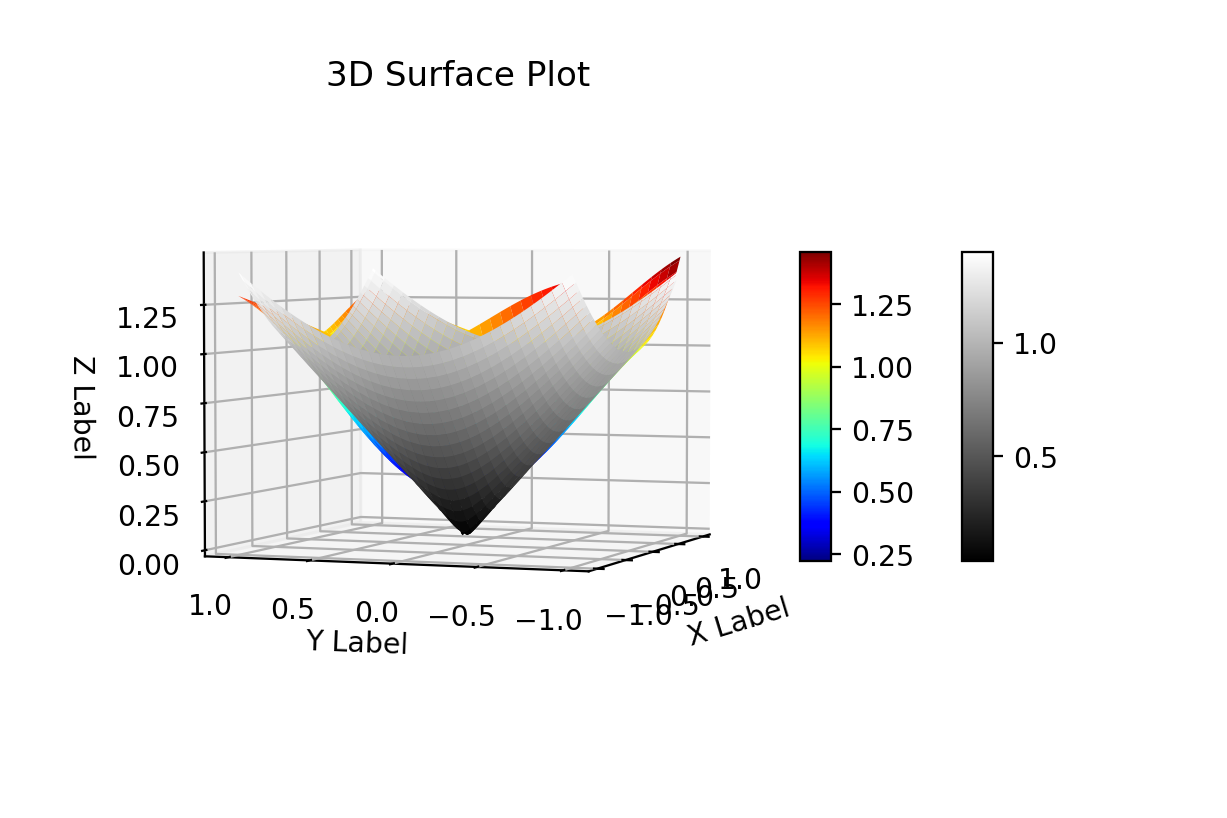

In [12]:
# ####3d plots to compare the target and predicted functions
%matplotlib nbagg
# Create a figure and a 3D subplot
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')


# Create a 3D surface plot
yy_preds = predictions.reshape(int(predictions.shape[1]**0.5),-1)
surface1 = ax.plot_surface(xx1, xx2, yy, cmap='gray',shade='gouraud',zorder=1)
surface2 = ax.plot_surface(xx1, xx2, yy_preds, cmap='jet',shade='gouraud',zorder=2)

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set the title
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surface1, shrink=0.5, aspect=10)
fig.colorbar(surface2, shrink=0.5, aspect=10)

# Show the plot
plt.show()




# fig,ax = plt.subplots(1)
# ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
# ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
# ax.legend()
# ax.set_title("Target function  and Predicted function")
# plt.show()


Works fine!
<br/>
<b>Important to note:- </b> When the number of hidden neurons is way to higher than required, the system does not converge. According to chat-GPT it's because reaching a local minimum which is not good enough. <b>More the hidden neurons --> Higher dimension weight-space --> Many local minima.</b>

## Trying to understand " More the hidden neurons  --> Many local minima"

### Try to approximate a sigmoid function "my_altered_sigmoid"
<br/>
(only need one neuron for this simple function, but trying multiple range hidden neuron counts and compare the performance )

Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.62 secs


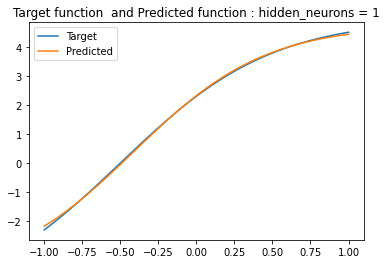

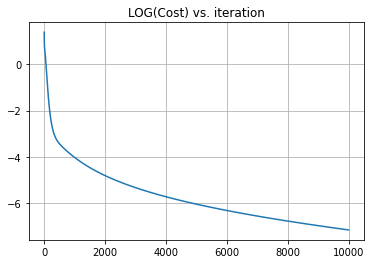

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.71 secs


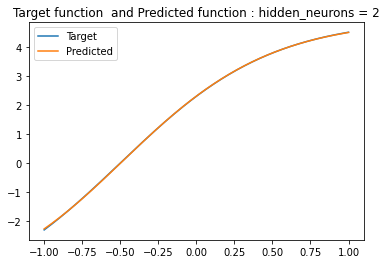

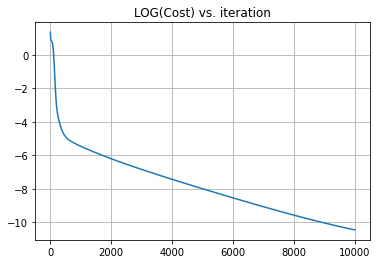

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.71 secs


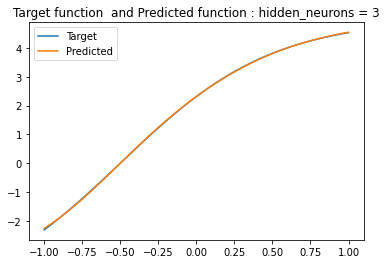

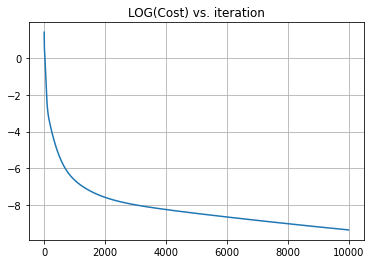

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.79 secs


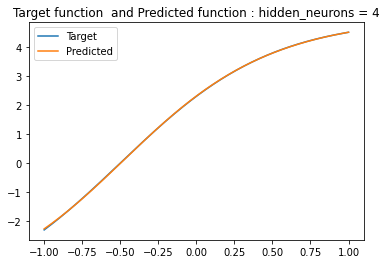

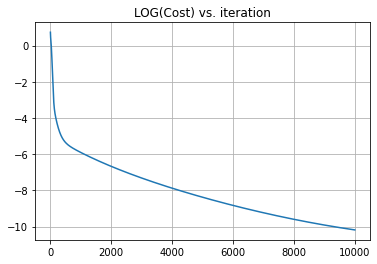

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.86 secs


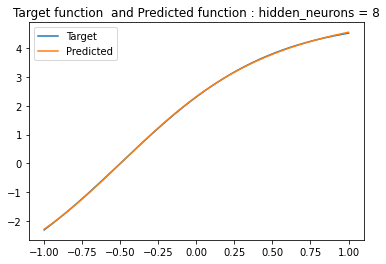

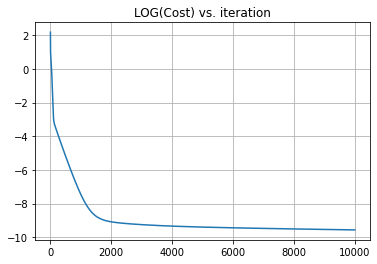

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.24 secs


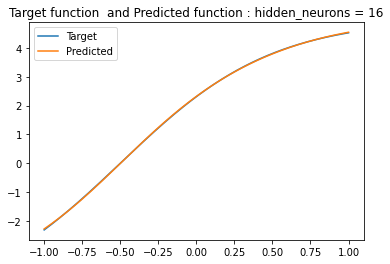

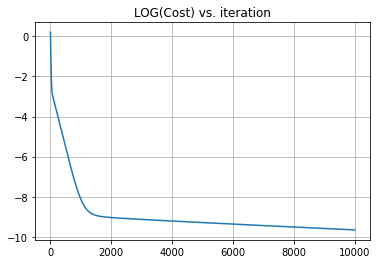

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.83 secs


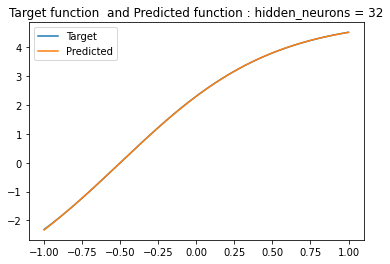

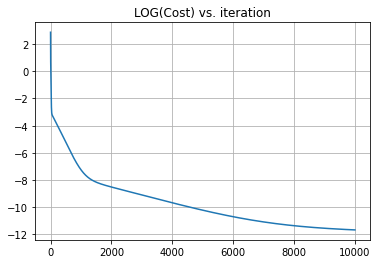

----------------END------------
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 4.76 secs


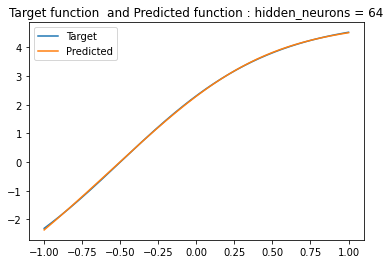

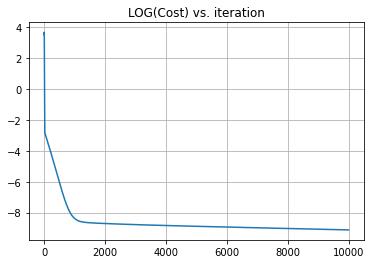

----------------END------------


KeyboardInterrupt: 

In [13]:
%matplotlib inline
# define a polynomial
def my_altered_sigmoid(x):
    return 10 * sigmoid(2*x + 1) - 5
    


# make a data set
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_altered_sigmoid(x_train)

# try following hidden neuron conuts and compare the performance
hidden_neuron_counts_to_test = [1,2,3,4,8,16,32,64,128,256]
for n_hidden_neurons in hidden_neuron_counts_to_test:

    my_fa = FA(n_input_neurons=1,n_hidden_neurons=n_hidden_neurons,learning_rate=1e-1,n_iters=1_0_000,intermidiate_activation_function='sigmoid') 
    my_fa.fit(x_train,y_train)


    predictions = my_fa.predict(x_train)

    fig,ax = plt.subplots(1)
    ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
    ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
    ax.legend()
    ax.set_title(f"Target function  and Predicted function : hidden_neurons = {n_hidden_neurons}")
    plt.show()

    my_fa.show_cost_history(log=True)
    print("----------------END------------")


### Little more complicated function : weighted sum of (previous-like) altered sigmoids

Now at least 3 neurons need to model the pattern

Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 6.35 secs


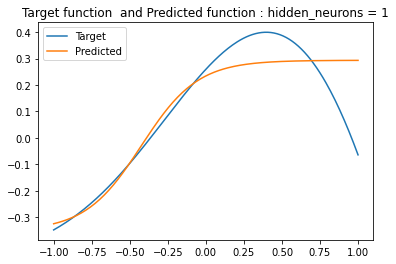

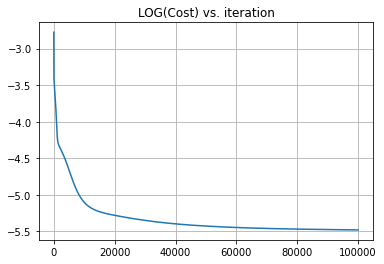

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 6.6 secs


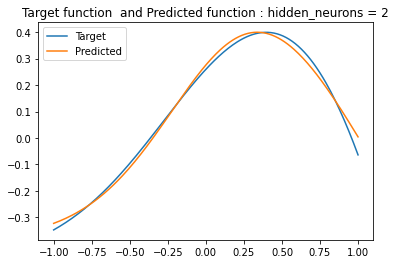

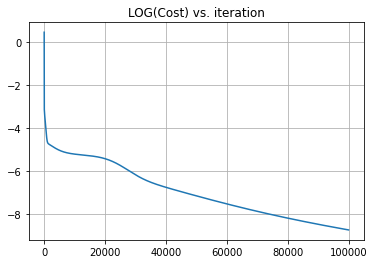

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 7.98 secs


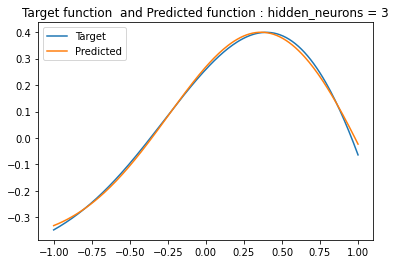

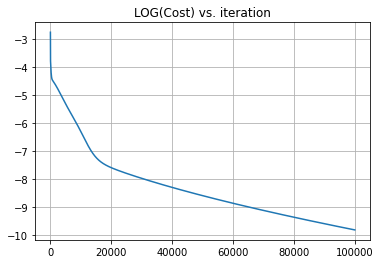

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 8.41 secs


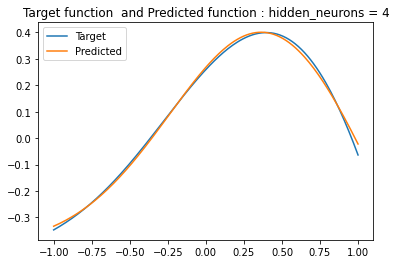

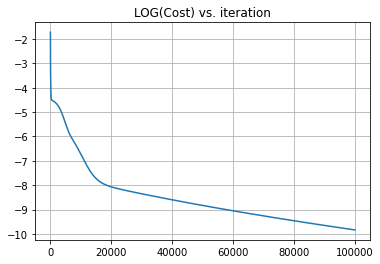

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 9.47 secs


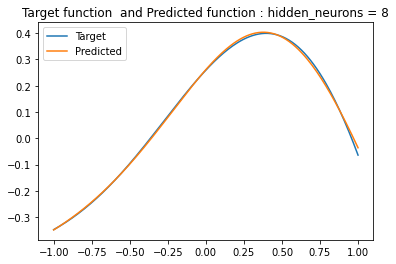

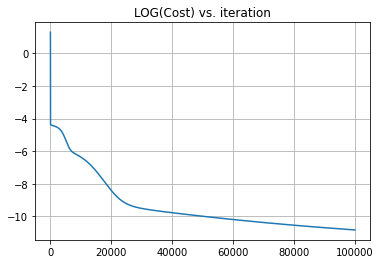

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 11.29 secs


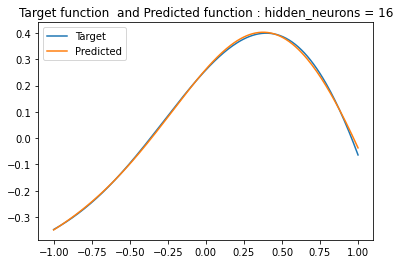

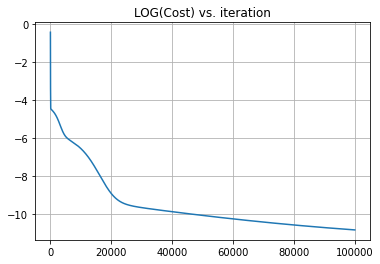

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 15.68 secs


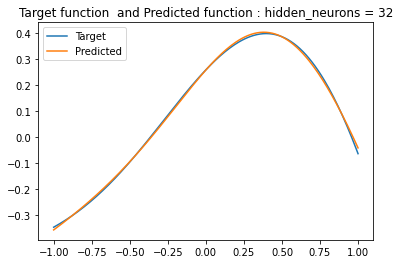

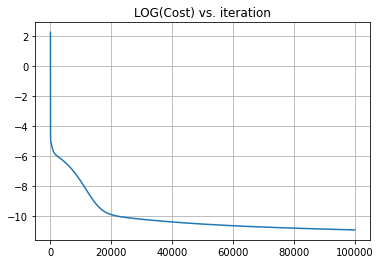

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 48.39 secs


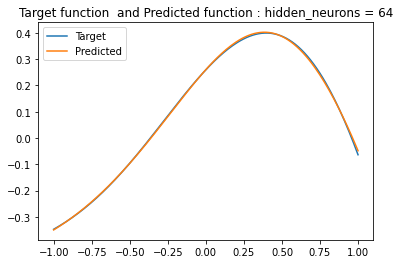

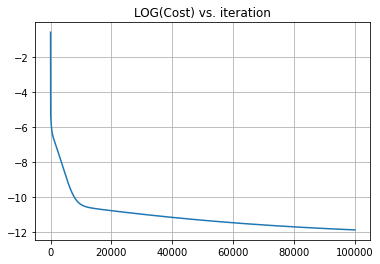

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 1 min 15.8 secs


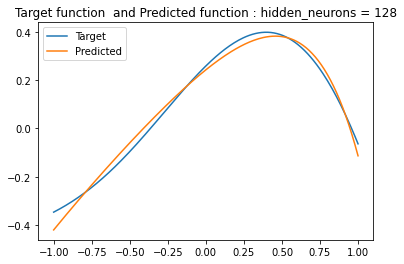

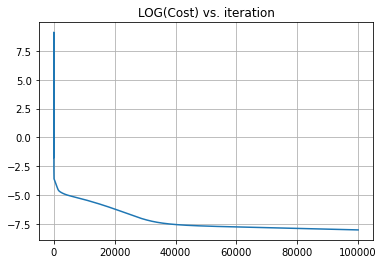

----------------END------------
Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 2 min 15.13 secs


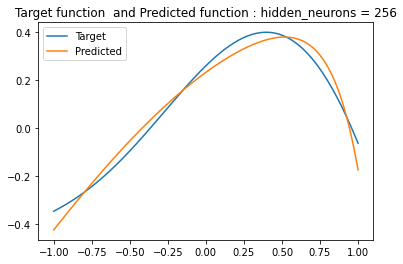

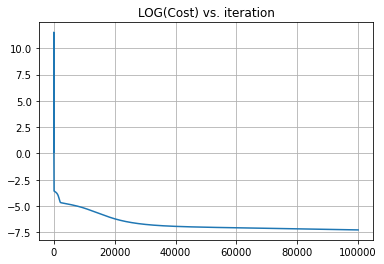

----------------END------------


In [77]:
%matplotlib inline
# define a polynomial
def my_altered_complicated_sigmoid(x):
    return (0.5 * sigmoid(3*x + 1)) + (-5 * sigmoid(2*x - 2.7)) + (2 * sigmoid(2*x - 0.6)) - 0.5
    


# make a data set
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_altered_complicated_sigmoid(x_train)

# try following hidden neuron conuts and compare the performance
hidden_neuron_counts_to_test = [1,2,3,4,8,16,32,64,128,256]
for n_hidden_neurons in hidden_neuron_counts_to_test:

    my_fa = FA(n_input_neurons=1,n_hidden_neurons=n_hidden_neurons,learning_rate=1e-1,n_iters=1_00_000,intermidiate_activation_function='sigmoid') 
    my_fa.fit(x_train,y_train)


    predictions = my_fa.predict(x_train)

    fig,ax = plt.subplots(1)
    ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
    ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
    ax.legend()
    ax.set_title(f"Target function  and Predicted function : hidden_neurons = {n_hidden_neurons}")
    plt.show()

    my_fa.show_cost_history(log=True)
    del my_fa
    print("----------------END------------")


Clearly we can see,<font color="red"><b> Unregularized NNs with way too many (than the required amount) neurons results in less performance than the NNs with moderate amount of hidden neurons.</b></font>

## Try a spiral-like distribution in 2D
Even though the model above created is for <font color="red">regression</font>, let's see it's performance for classification as well.

In [14]:
def get_spiral_distribution(n_points=100,noise_stats=(0,0),revolutions=1,radial_offset=0):
    '''
    Generate a set of (x1,x2) domain for spiral with mentioned noise stats : (mean,sigma)
    '''
    theta = np.random.rand(n_points) * 2 * np.pi * revolutions
    radius = np.sqrt(theta) + radial_offset
    mean,sigma = noise_stats
    noise_for_radius = np.random.randn(n_points) * sigma + mean
    radius += noise_for_radius
    x1 = radius * np.cos(theta)
    x2 = radius * np.sin(theta)
    X = np.concatenate((x1.reshape(1,-1),x2.reshape(1,-1)))
    return X
    

    

spiral_X1 : Positive <br/>
spiral_X2 : Negative

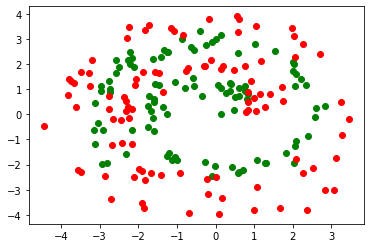

In [15]:

spiral_X1 = get_spiral_distribution(revolutions=1.6,noise_stats=(0.05,0.2))
spiral_X2 = get_spiral_distribution(revolutions=1.9,radial_offset=0.8,noise_stats=(0.05,0.3))


#plot and see
fig,ax = plt.subplots(1)
ax.scatter(spiral_X1[0,:],spiral_X1[1,:],color='green')
ax.scatter(spiral_X2[0,:],spiral_X2[1,:],color='red')
plt.show()

In [16]:
# create the data set <-- combine positive and negative examples to a single array
X_spiral_train = np.hstack((spiral_X1,spiral_X2))
Y_spiral_train = np.hstack( ( np.ones((1,spiral_X1.shape[1])),
                              np.zeros((1,spiral_X2.shape[1])) ))


Training ended : n_iters: 1000000 with learning_rate : 0.1. Time taken : 2 min 31.13 secs


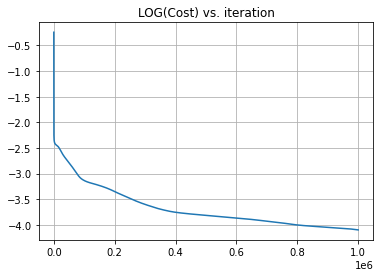

In [17]:
my_spiral_fa = FA(n_input_neurons=2,
                  n_hidden_neurons=32,
                  intermidiate_activation_function='sigmoid',
                  learning_rate=1e-1,
                  n_iters=1_000_000)


my_spiral_fa.fit(X_spiral_train,Y_spiral_train)

my_spiral_fa.show_cost_history(log=1)



In [18]:
predictions = np.int32(my_spiral_fa.predict(X_spiral_train) > 0.5)
accuracy = (predictions == Y_spiral_train).sum() / Y_spiral_train.shape[1]

display(HTML(f"<br/><font color='red' size='5'><b>Accuracy : {accuracy}</b></font>"))


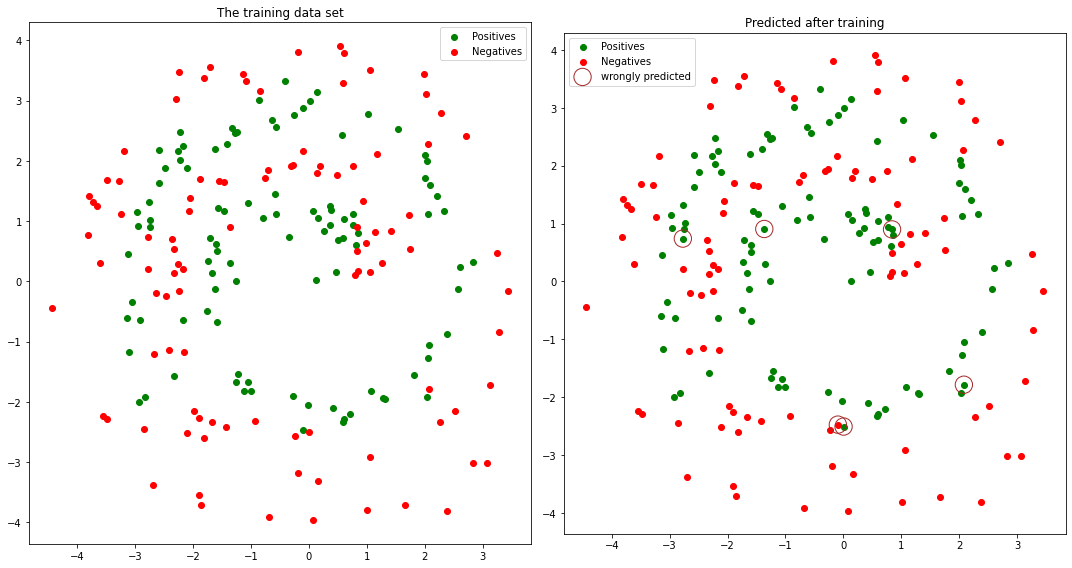

In [19]:
# from predictions clasify the training set in to positive and negatives
pred_positives = X_spiral_train[:,predictions.reshape(-1)==1]
pred_negatives = X_spiral_train[:,predictions.reshape(-1)!=1]

#filter the wrongly identified ones
wrong_ones = X_spiral_train[:,predictions.reshape(-1)!=Y_spiral_train.reshape(-1)]

#plot and see
fig,ax = plt.subplots(1,2,figsize=(15,8))

ax[0].scatter(spiral_X1[0,:],spiral_X1[1,:],color='green',label="Positives")
ax[0].scatter(spiral_X2[0,:],spiral_X2[1,:],color='red',label="Negatives")
ax[0].set_title("The training data set")

ax[1].scatter(pred_positives[0,:],pred_positives[1,:],color='green',label="Positives")
ax[1].scatter(pred_negatives[0,:],pred_negatives[1,:],color='red',label="Negatives")
ax[1].set_title("Predicted after training")

ax[1].scatter(wrong_ones[0,:],wrong_ones[1,:],facecolors='none', edgecolors='brown', s=300,label="wrongly predicted")

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.gca().set_aspect('equal')

plt.show()

<font color="red">
    We saw that the model cannot perform well when there are way too more than hidden neurons.<br/>
    So we will try a regularization and drop out too in "07--3.1.1"
</font>